Step 0 - import packages

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 1 - create pandas dataframe 

In [4]:
df = pd.read_csv("meteorites.csv")

In [5]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [7]:
df['fall'].value_counts()

fall
Found    44609
Fell      1107
Name: count, dtype: int64

Step 2 - Clean the Data
-In the 'fall' column, I only want to look at 'fell' and not 'found'. I need to remove all of the files with 'found'.
-Then the there are some columns I don't need: nametype, reclat, reclong, GeoLocation
-Lastly, the year is in the wrong format. It should be an int, not a float. 


In [8]:
#filter out any value of "Found"
meteorites_df = df[df.fall == "Fell"]
meteorites_df['fall'].value_counts()

fall
Fell    1107
Name: count, dtype: int64

In [9]:
#remove columns: nametype, reclat, reclong, GeoLocation
meteorites_df = meteorites_df.drop(columns=['nametype', 'reclat', 'reclong', 'GeoLocation'])
meteorites_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1107 entries, 0 to 1110
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1107 non-null   object 
 1   id        1107 non-null   int64  
 2   recclass  1107 non-null   object 
 3   mass (g)  1075 non-null   float64
 4   fall      1107 non-null   object 
 5   year      1107 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 60.5+ KB


In [10]:
# change year type to int
meteorites_df['year'] = meteorites_df['year'].astype(int)
meteorites_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1107 entries, 0 to 1110
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1107 non-null   object 
 1   id        1107 non-null   int64  
 2   recclass  1107 non-null   object 
 3   mass (g)  1075 non-null   float64
 4   fall      1107 non-null   object 
 5   year      1107 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 56.2+ KB


In [11]:
# Any null values?
print(meteorites_df.isna().sum())

name         0
id           0
recclass     0
mass (g)    32
fall         0
year         0
dtype: int64


In [12]:
#drop null values for mass and rename column
meteorites_df.rename(columns={'mass (g)':'mass'}, inplace=True)
meteorites_df = meteorites_df.dropna()
print(meteorites_df.isna().sum())

name        0
id          0
recclass    0
mass        0
fall        0
year        0
dtype: int64


In [13]:
#double check to make sure everything is working correctly. 
meteorites_df.info()
meteorites_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1075 entries, 0 to 1110
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1075 non-null   object 
 1   id        1075 non-null   int64  
 2   recclass  1075 non-null   object 
 3   mass      1075 non-null   float64
 4   fall      1075 non-null   object 
 5   year      1075 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 54.6+ KB


,name,id,recclass,mass,fall,year
0,Aachen,1,L5,21.0,Fell,1880
1,Aarhus,2,H6,720.0,Fell,1951
2,Abee,6,EH4,107000.0,Fell,1952
3,Acapulco,10,Acapulcoite,1914.0,Fell,1976
4,Achiras,370,L6,780.0,Fell,1902


Step 3 - Basic Data Expoloration


In [14]:
# take a look at the mass data. 
smallest_meteor = meteorites_df['mass'].min()
largest_meteor = meteorites_df['mass'].max()
median_meteor = meteorites_df['mass'].median()
print(f"The smallest meteorite was {smallest_meteor} grams")
print(f"The largest meteorite was {largest_meteor} grams")
print(f"The median meteor size was {median_meteor} grams")

The smallest meteorite was 0.1 grams
The largest meteorite was 23000000.0 grams
The median meteor size was 2800.0 grams


In [15]:
# 23000000.0 grams is difficult to conceptualize. Do a quick conversion to lbs. 1 gram = 0.0022 lbs
print(f"In pounds, the largest meteor weighed {(largest_meteor * 0.0022):,.0f} lbs!")

In pounds, the largest meteor weighed 50,600 lbs!


It looks like there is a very large range of meteor sizes. We might be better off to categorize. But I need to better visualize the data before I know what the categories should be. First thing to try to should be a histogram of the mass. 

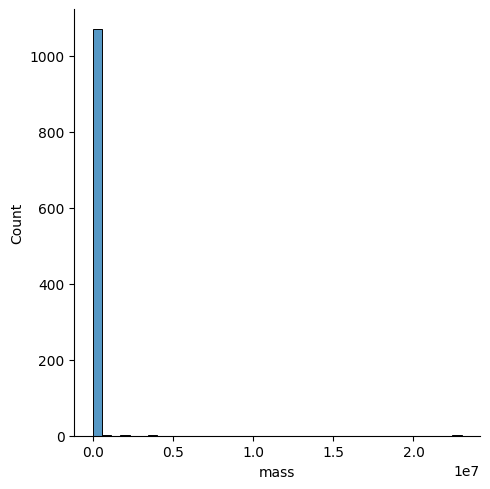

In [16]:
sns.displot(data=meteorites_df, x='mass', bins=40)
plt.show()

Judging by chart above, the largest appears to be an outlier? While it's interesting how heavy the biggest meteor was, for our analysis, its preventing us from really analyzing the data. So, we're going to remove outliers from the data and try again. 

In [17]:
# find the 75th and 25th percentiles
mass_seventy_fifth = meteorites_df['mass'].quantile(0.75)
mass_twenty_fifth = meteorites_df['mass'].quantile(0.25)

#calculate iqr
mass_iqr = mass_seventy_fifth - mass_twenty_fifth

#calculate thresholds
upper = mass_seventy_fifth + (1.5 * mass_iqr)
lower = mass_twenty_fifth - (1.5 * mass_iqr)

#subset data
meteorites_df = meteorites_df[(meteorites_df['mass'] > lower) & (meteorites_df['mass'] < upper)]
meteorites_df['mass'].describe()

count      921.000000
mean      4169.178773
std       5492.221984
min          0.100000
25%        500.000000
50%       1850.000000
75%       5200.000000
max      25000.000000
Name: mass, dtype: float64

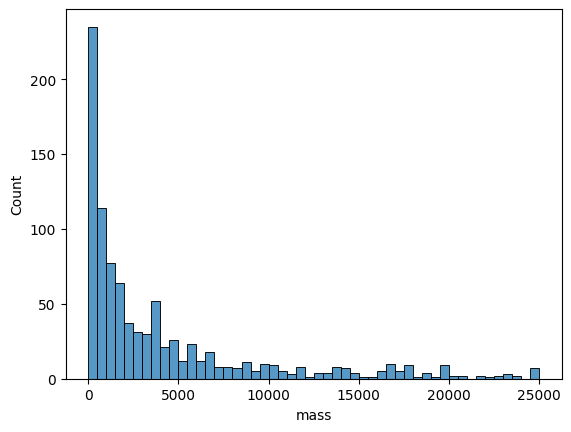

In [19]:
# With outliers removed, try a chart again
sns.histplot(data=meteorites_df, x='mass', bins=50)
plt.show()

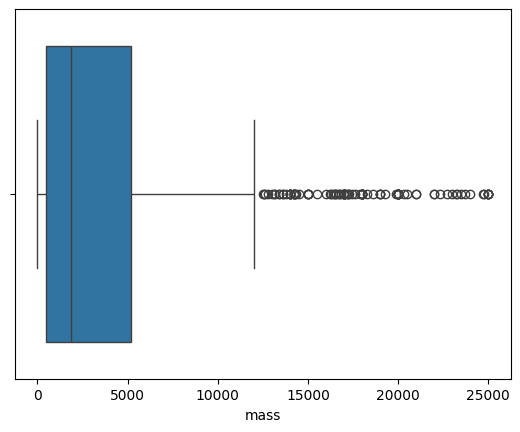

In [21]:
# Same data as a boxplot
sns.boxplot(data=meteorites_df, x="mass")
plt.show()

In [23]:
# define the categories
twenty_fifth_mass = meteorites_df["mass"].quantile(0.25)
forty_fifth_mass = meteorites_df["mass"].quantile(0.45)
fifty_fifth_mass = meteorites_df["mass"].quantile(0.55)
seventy_fifth_mass = meteorites_df["mass"].quantile(0.75)
print(f"Extra small meteorites are less than {twenty_fifth_mass:,.0f} grams")
print(f"Small meteorites are between {twenty_fifth_mass:,.0f} and {forty_fifth_mass:,.0f} grams")
print(f"Medium meteorites are between {forty_fifth_mass:,.0f} and {fifty_fifth_mass:,.0f} grams")
print(f"Large meteorites are between {fifty_fifth_mass:,.0f} and {seventy_fifth_mass:,.0f} grams")
print(f"Extra large meteorites are more than {seventy_fifth_mass:,.0f} grams")


Extra small meteorites are less than 500 grams
Small meteorites are between 500 and 1,500 grams
Medium meteorites are between 1,500 and 2,300 grams
Large meteorites are between 2,300 and 5,200 grams
Extra large meteorites are more than 5,200 grams


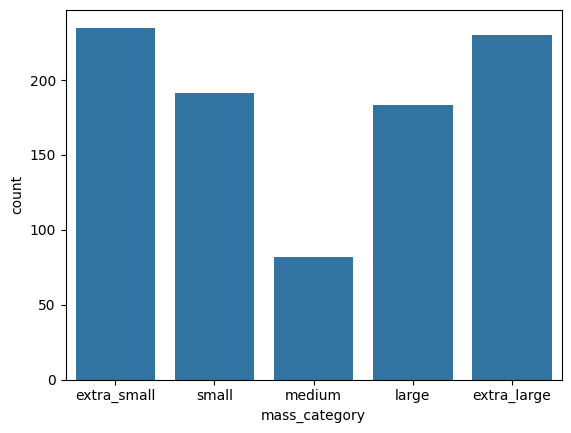

In [24]:
#create labels for mass categories
mass_labels = ["extra_small", "small", "medium", "large", "extra_large"]

#create range list
mass_ranges = [0, twenty_fifth_mass, forty_fifth_mass, fifty_fifth_mass, seventy_fifth_mass, meteorites_df["mass"].max()]

#Create mass_category
meteorites_df["mass_category"] = pd.cut(meteorites_df["mass"], bins=mass_ranges, labels=mass_labels)

#visualize categories
sns.countplot(data=meteorites_df, x="mass_category")
plt.show()